## 고양이 수염 프로젝트


In [269]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np


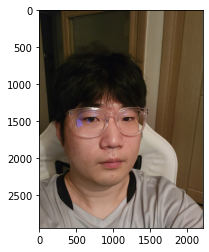

In [270]:
my_image_path = "./고양이수염붙일_셀카.png" ## 갤럭시 폰으로 찍었을 때 jpg로 반환해줘서 인터넷에 있는 jpg png 변환 프로그램 사용,,, -> 시간이 남으면 두 개의 차이점 비교
img_bgr = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) ## image rgb 변환
img_show = img_bgr.copy()
plt.imshow(img_rgb) ## 변환된 img_rgb 출력 
plt.show()

In [ ]:
## matlab 대신 cv2를 통해 이미지 확인, -> kernel error 
cv2.imshow('Image', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [271]:
detector_hog = dlib.get_frontal_face_detector() ## 기본 얼굴 감지
dlib_rects = detector_hog(img_rgb, 1) ## 선의 두께 paramater 값을 1 이상으로 설정하면 kernel이 종료됨 

Left: 357, Top: 1125, Right: 1508, Bottom: 2275


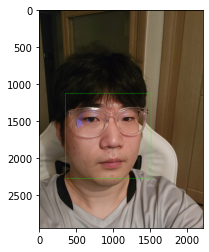

In [272]:
## 찾을 얼굴 영역 박스 리스트

for dlib_rect in dlib_rects:
    l = dlib_rect.left() ## 왼쪽 
    t = dlib_rect.top() ## 위쪽
    r = dlib_rect.right() ## 오른쪽
    b = dlib_rect.bottom() ## 아래쪽
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    # 좌표 출력
    print(f"Left: {l}, Top: {t}, Right: {r}, Bottom: {b}")

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


In [6]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 ## landmarks.dat download

--2024-09-09 04:06:59--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  78.8MB/s    in 0.8s    

2024-09-09 04:07:00 (78.8 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [7]:
!mv shape_predictor_68_face_landmarks.dat.bz2  ~/aiffel/AIFFEL_quest_cr/Exploration/EX03 ## 현재 디렉토리로 이동

mv: 'shape_predictor_68_face_landmarks.dat.bz2' and '/aiffel/aiffel/AIFFEL_quest_cr/Exploration/EX03/shape_predictor_68_face_landmarks.dat.bz2' are the same file


In [9]:
!bzip2 -d ./shape_predictor_68_face_landmarks.dat.bz2 ## 압축해제

In [273]:
## top-down algorithm 사용 

model_path = './shape_predictor_68_face_landmarks.dat' ## node1 때 사용했던 landmark 사용

landmark_predictor = dlib.shape_predictor(model_path)


In [274]:
list_landmarks =[]

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points =  list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


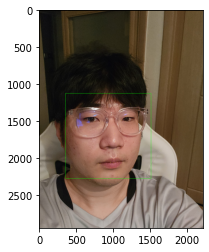

In [275]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


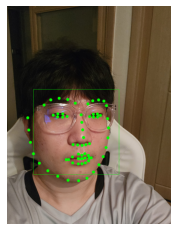

In [276]:
# 점 그리기
for landmark in list_landmarks:
    for point in landmark:
        # 좌표를 튜플로 변환하고 점의 크기와 색상을 변경
        point = tuple(point)
        cv2.circle(img_show, point, 20, (0,255,0), -1) ## 위에서는 점이 찍혔는지 확인하기 어려워서 점의 색깔과 크기를 조절
# BGR 이미지를 RGB로 변환
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# 이미지를 표시
plt.imshow(img_show_rgb)
plt.axis('off')  # image에 다른 채널이 포함되어 있을 수 있음으로 축을 숨기고
plt.show()

In [277]:
# 코와 입 사이의 거리 측정
for dlib_rect, landmarks in zip(dlib_rects, list_landmarks):
    # 코와 입 좌표 추출
    nose_tip = landmarks[30]  # 코 끝
    mouth_left = landmarks[48]  # 왼쪽 입
    mouth_right = landmarks[54]  # 오른쪽 입
    
    # 입 중앙 계산
    mouth_center = ((mouth_left[0] + mouth_right[0]) // 2, (mouth_left[1] + mouth_right[1]) // 2)
    
    # y 좌표 계산 (코의 y좌표 - 얼굴 영역의 세로 절반)
    y = nose_tip[1] - dlib_rect.height() // 2
    
    # 코와 입 중앙 사이의 거리 계산
    distance = np.linalg.norm(np.array(nose_tip) - np.array(mouth_center)) ## 유클리드 거리 공식 distance = sqrt(dx^2 + dy^2)
    
    ## 얼굴 영역의 가로를 차지하는 픽셀의 수 
    w = h = dlib_rect.width()
    
    print(f"Nose Tip (x, y): {nose_tip}")
    print(f"Mouth Left (x, y): {mouth_left}")
    print(f"Mouth Right (x, y): {mouth_right}")
    print(f"Mouth Center (x, y): {mouth_center}")
    print(f"Distance between Nose Tip and Mouth Center: {distance:.2f}")
    print(f"face area horizontal pixcel: (w,h) : ({w},{h})" )
    print(f"Adjusted y coordinate of Nose Tip: {y}")

Nose Tip (x, y): (1031, 1776)
Mouth Left (x, y): (798, 2075)
Mouth Right (x, y): (1134, 2050)
Mouth Center (x, y): (966, 2062)
Distance between Nose Tip and Mouth Center: 293.29
face area horizontal pixcel: (w,h) : (1152,1152)
Adjusted y coordinate of Nose Tip: 1201


In [278]:
cat_beard = os.getenv('HOME') + '/aiffel/AIFFEL_quest_cr/Exploration/EX03/고양이수염png' ## 고양이 수염 이미지 경로
img_cat_beard = cv2.imread(cat_beard)
img_sticker = cv2.resize(img_cat_beard, (w,h))
print(img_cat_beard.shape)

(256, 256, 3)


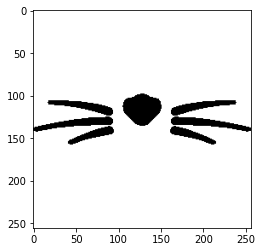

In [279]:
plt.imshow(img_cat_beard)

In [280]:
refined_x = mouth_center[0] 
refined_y = mouth_center[1] 
print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (966,2062)


In [281]:
sticker_area = img_show[refined_y:refined_y+img_cat_beard.shape[0], refined_x:refined_x+img_cat_beard.shape[1]]

In [284]:
img_bgr[refined_y:refined_y +img_cat_beard.shape[0] , refined_x:refined_x+ img_cat_beard.shape[1]] = \
    np.where(img_cat_beard!=1,sticker_area,img_cat_beard).astype(np.uint8)

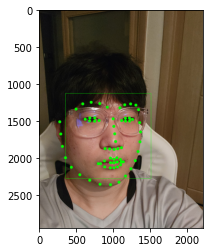

In [285]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 회고

좌표 부분에서 너무 많은 시간을 써서 나머지 부가적인 요소를 좀 더 보지 못한 부분이 아쉽다.
마지막 고양이 수염 붙이는 부분에서 채널 문제인거 같은데 아직 해결이 되지 않아서 아쉽다. 
opencv를 c++로 써봤는데 확실히 python이 편한거 같다. 